In [1]:
import pandas as pd

# Load the dataset directly from the zip file
df = pd.read_csv('creditcard.csv.zip')

# Show the first 5 rows to check if it worked
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Count the number of Legit (0) vs Fraud (1) transactions
counts = df['Class'].value_counts()
print(counts)

# Calculate the percentage of fraud
fraud_percent = (counts[1] / len(df)) * 100
print(f"Fraud Percentage: {fraud_percent:.3f}%")

Class
0    284315
1       492
Name: count, dtype: int64
Fraud Percentage: 0.173%


In [3]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize the Scaler tool
scaler = StandardScaler()

# 2. Shrink 'Amount' and 'Time' to be small numbers like V1-V28
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# 3. Show the table again to check our work
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Separate the "Features" (X) from the "Target" (y)
X = df.drop('Class', axis=1) # All columns except 'Class'
y = df['Class']              # Only the 'Class' column

# 2. Split into Training and Testing sets
# We hold back 20% of the data (X_test) to test the model later.
# We never show the test data to the model during training!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Apply SMOTE to ONLY the training set
# This creates the synthetic fraud cases to balance the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 4. Check the new numbers to prove it worked
print("Before SMOTE (Original):")
print(y_train.value_counts())
print("\nAfter SMOTE (Balanced):")
print(y_train_res.value_counts())

Before SMOTE (Original):
Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE (Balanced):
Class
0    227451
1    227451
Name: count, dtype: int64


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. Initialize the "Forest" (The Model)
# n_estimators=100 means we are using 100 "detectives" (trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model on the BALANCED data
print("Training the model... (This might take 1-2 minutes)")
rf_model.fit(X_train_res, y_train_res)

# 3. Test the model on the UNSEEN test data (X_test)
# Remember: The test set was never SMOTEd, so it's like real-world data
y_pred = rf_model.predict(X_test)

# 4. Show the score card
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

Training the model... (This might take 1-2 minutes)

--- Confusion Matrix ---
[[56856     8]
 [   17    81]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.83      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



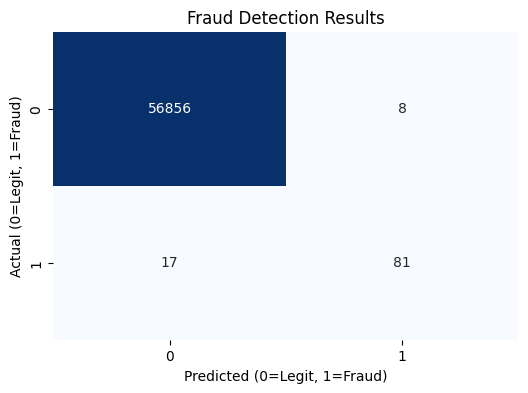

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Fraud Detection Results')
plt.xlabel('Predicted (0=Legit, 1=Fraud)')
plt.ylabel('Actual (0=Legit, 1=Fraud)')
plt.show()

In [6]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'fraud_model.pkl')
print("Model saved successfully as 'fraud_model.pkl'!")

Model saved successfully as 'fraud_model.pkl'!


In [7]:
import joblib
import numpy as np

# 1. Load your saved model (simulating a server starting up)
model = joblib.load('fraud_model.pkl')

# 2. Let's pick a random transaction from our test data to test it
# We will grab transaction #50 from our test set
new_transaction = X_test.iloc[50].values.reshape(1, -1)
true_label = y_test.iloc[50]

# 3. Ask the model: "Is this fraud?"
prediction = model.predict(new_transaction)[0]

# 4. Print the results
print("--- NEW TRANSACTION DETECTED ---")
print(f"Actual Reality: {'FRAUD' if true_label==1 else 'Legit'}")
print(f"AI Prediction:  {'FRAUD' if prediction==1 else 'Legit'}")

if true_label == prediction:
    print("\n✅ SUCCESS! The System flagged it correctly.")
else:
    print("\n❌ FAILURE! The System missed it.")

--- NEW TRANSACTION DETECTED ---
Actual Reality: Legit
AI Prediction:  Legit

✅ SUCCESS! The System flagged it correctly.


C:\Users\Hasintha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
